In [245]:
from heapq import nlargest, nsmallest
from matplotlib.pyplot import figure
from scipy import stats
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

### Load and Preview GoodReads Genres Dataset

The GoodReads dataset collection scraped by UC San Diego in 2017 is an expansive compilation of data, which includes various publicly available information from GoodReads.com. The data collection includes CSVs and JSONs files of books, users' shelves, and reviews. One of the datasets of particular interest, and one I have analyzed for Data 607, is the user-generated book genres dataset. I use the term “user-generated” and UCSD researchers use the term “fuzzy” to describe the genre dataset, since GoodReads does not assign genres to books but instead lists the genres users have associated the books with. After intensive data manipulation, the format that precedes the adjacency matrix can be previewed below.

In [3]:
df_books_raw = pd.read_csv("goodreads_book_genres_2k.csv")

In [5]:
df_books_raw.columns

Index(['Unnamed: 0', 'title', 'book_id', 'publication_year', 'ratings_count',
       'language_code', 'average_rating', 'economics', 'politics', 'sociology',
       'society', 'political-science', 'government', 'history', 'philosophy',
       'theory'],
      dtype='object')

In [10]:
df_books = df_books_raw[['book_id', 'economics', 'politics', 'sociology', 'society', 
                         'political-science', 'government', 'history', 'philosophy','theory']]

In [134]:
df_books.head()

,economics,politics,sociology,society,political-science,government,history,philosophy,theory
book_id,,,,,,,,,
287149,0,0,0,0,0,0,0,1,0
89376,0,0,0,0,0,0,0,1,0
6158967,0,1,0,1,0,0,0,0,0
25166650,0,0,0,0,0,0,1,1,0
20924358,0,0,0,0,0,0,1,0,0


In [13]:
df_books = df_books.set_index('book_id')

### Affiliation Matrix 

Generate affiliation matrix as specified [here](https://dshizuka.github.io/networkanalysis/02_dataformats.html), where we perform matrix multiplication on the transpose of the df_books dataframe.

In [14]:
df_books_transpose = df_books.transpose()
df_aff = df_books.dot(df_books_transpose);

Preview data

In [21]:
df_aff.head()

book_id,287149,89376,6158967,25166650,20924358,828180,18498572,33022718,18908446,11731786,...,1035010,34150849,1326,13538716,7815110,871243,386783,16241152,2437975,16194
book_id,,,,,,,,,,,,,,,,,,,,,
287149,1,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
89376,1,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6158967,0,0,2,0,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
25166650,1,1,0,2,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
20924358,0,0,0,1,1,1,1,0,0,0,...,1,1,0,1,1,1,1,1,1,1


Normalize the weights. Nine is the number of genres included in the analysis.

In [301]:
df_aff = df_aff.div(9).round(4)

Preview data

In [302]:
df_aff.head()

book_id,287149,89376,6158967,25166650,20924358,828180,18498572,33022718,18908446,11731786,...,1035010,34150849,1326,13538716,7815110,871243,386783,16241152,2437975,16194
book_id,,,,,,,,,,,,,,,,,,,,,
287149,0.1111,0.1111,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.1111,0.0000,...,0.0000,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
89376,0.1111,0.1111,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.1111,0.0000,...,0.0000,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6158967,0.0000,0.0000,0.2222,0.0000,0.0000,0.0000,0.1111,0.1111,0.0000,0.1111,...,0.0000,0.1111,0.0000,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.1111
25166650,0.1111,0.1111,0.0000,0.2222,0.1111,0.1111,0.1111,0.0000,0.1111,0.0000,...,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
20924358,0.0000,0.0000,0.0000,0.1111,0.1111,0.1111,0.1111,0.0000,0.0000,0.0000,...,0.1111,0.1111,0.0000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


### Load to NetworkX

In [303]:
G_new = nx.from_pandas_adjacency(df_aff)

Check weights were loaded correctly

In [337]:
G_new.get_edge_data(18498572, 54270)

{'weight': 0.2222}

### Add categorical variables to nodes

In [305]:
for book_id in G_new.nodes:
    G_new.nodes[book_id]["economics"] = df_books.loc[df_books.index==book_id]["economics"].values[0]
    G_new.nodes[book_id]["politics"] = df_books.loc[df_books.index==book_id]["politics"].values[0]
    G_new.nodes[book_id]["sociology"] = df_books.loc[df_books.index==book_id]["sociology"].values[0]
    G_new.nodes[book_id]["society"] = df_books.loc[df_books.index==book_id]["society"].values[0]
    G_new.nodes[book_id]["political-science"] = df_books.loc[df_books.index==book_id]["political-science"].values[0]
    G_new.nodes[book_id]["government"] = df_books.loc[df_books.index==book_id]["government"].values[0]
    G_new.nodes[book_id]["history"] = df_books.loc[df_books.index==book_id]["history"].values[0]
    G_new.nodes[book_id]["philosophy"] = df_books.loc[df_books.index==book_id]["philosophy"].values[0]
    G_new.nodes[book_id]["theory"] = df_books.loc[df_books.index==book_id]["theory"].values[0]

Check categorical data was added correctly

In [331]:
list(G_new.nodes.data())

[(699094,
  {'economics': 0,
   'politics': 0,
   'sociology': 0,
   'society': 0,
   'political-science': 0,
   'government': 0,
   'history': 1,
   'philosophy': 0,
   'theory': 0}),
 (849183,
  {'economics': 1,
   'politics': 0,
   'sociology': 0,
   'society': 0,
   'political-science': 0,
   'government': 0,
   'history': 1,
   'philosophy': 0,
   'theory': 0}),
 (401993,
  {'economics': 1,
   'politics': 0,
   'sociology': 0,
   'society': 0,
   'political-science': 0,
   'government': 0,
   'history': 0,
   'philosophy': 0,
   'theory': 0}),
 (16280867,
  {'economics': 0,
   'politics': 0,
   'sociology': 0,
   'society': 0,
   'political-science': 0,
   'government': 0,
   'history': 1,
   'philosophy': 0,
   'theory': 0}),
 (16194,
  {'economics': 0,
   'politics': 1,
   'sociology': 0,
   'society': 0,
   'political-science': 0,
   'government': 0,
   'history': 1,
   'philosophy': 0,
   'theory': 0}),
 (2437975,
  {'economics': 0,
   'politics': 0,
   'sociology': 0,
   'soc

### Centrality Measures

Calculate degree and eigenvector centrality for each node

In [307]:
degree_all = nx.degree_centrality(G_new)
degree_eigen_all = nx.eigenvector_centrality(G_new)

#### Top 10 Books by Highest Degree Centrality

**Important:** Doznes of books are tied for the top degree centrality measure.

In [336]:
top_books_degree = sorted(degree_all.items(), key=lambda item: item[1], reverse=True)
top_10_books_degree = [x[0] for x in top_books_degree[:10]] 
df_books_raw.loc[df_books.index.isin(top_10_books_degree)]["title"].values

array(['Sincerity: How a Moral Ideal Born Five Hundred Years Ago Inspired Religious Wars, Modern Art, Hipster Chic, and the Curious Notion That We All Have Something to Say (No Matter How Dull)',
       'Why Does E=mc²?',
       'The Greatest Show on Earth: The Evidence for Evolution',
       "The Perfect Nazi: Uncovering My Grandfather's Secret Past and How Hitler Seduced a Generation",
       'Mastery', 'The Lessons of History',
       'Alchemy and Mysticism: The Hermetic Museum', 'Fragments',
       'Ayn Rand and the World She Made',
       'The Beach Beneath the Street: The Everyday Life and Glorious Times of the Situationist International'],
      dtype=object)

#### Top 10 Books by Highest Eigenvector Centrality

**Important:** Hundreds of books are tied for the top eigenvector centrality measure.

In [309]:
top_books_eigen = sorted(degree_eigen_all.items(), key=lambda item: item[1], reverse=True)
top_10_books_eigen = [x[0] for x in top_books_eigen[:10]] 
df_books_raw.loc[df_books.index.isin(top_10_books_eigen)]["title"].values

array(['Sincerity: How a Moral Ideal Born Five Hundred Years Ago Inspired Religious Wars, Modern Art, Hipster Chic, and the Curious Notion That We All Have Something to Say (No Matter How Dull)',
       'Why Does E=mc²?',
       'The Greatest Show on Earth: The Evidence for Evolution',
       "The Perfect Nazi: Uncovering My Grandfather's Secret Past and How Hitler Seduced a Generation",
       'Mastery', 'The Lessons of History',
       'Alchemy and Mysticism: The Hermetic Museum', 'Fragments',
       'Ayn Rand and the World She Made',
       'The Beach Beneath the Street: The Everyday Life and Glorious Times of the Situationist International'],
      dtype=object)

### Compare centrality measures across categorical groups

#### Economics Degree Centrality

In [310]:
G_economics = [x for x,y in G_new.nodes(data=True) if y['economics']==1]
degree_centrality_economics_dict = {k: v for k, v in degree_all.items() if k in G_economics}
economics_values = [v for k, v in degree_centrality_economics_dict.items()]
print("Avg. Degree Centrality", sum(economics_values) / len(degree_centrality_economics_dict))
print("Maximum Degree Centrality", max(economics_values))
print("Minimum Degree Centrality", min(economics_values))

Avg. Degree Centrality 0.30052781492787173
Maximum Degree Centrality 0.743871935967984
Minimum Degree Centrality 0.07403701850925462


In [311]:
# figure(figsize=(8, 6), dpi=80)
# plt.hist([v for k, v in degree_centrality_economics_dict.items()])

#### Politics Degree Centrality

In [312]:
G_politics = [x for x,y in G_new.nodes(data=True) if y['politics']==1]
degree_centrality_politics_dict = {k: v for k, v in degree_all.items() if k in G_politics}
politics_values = [v for k, v in degree_centrality_politics_dict.items()]
print("Avg. Degree Centrality", sum(politics_values) / len(degree_centrality_politics_dict))
print("Maximum Degree Centrality", max(politics_values))
print("Minimum Degree Centrality", min(politics_values))

Avg. Degree Centrality 0.5805390676107269
Maximum Degree Centrality 0.7648824412206102
Minimum Degree Centrality 0.20860430215107553


#### Sociology Degree Centrality

In [313]:
G_sociology = [x for x,y in G_new.nodes(data=True) if y['sociology']==1]
degree_centrality_sociology_dict = {k: v for k, v in degree_all.items() if k in G_sociology}
sociology_values = [v for k, v in degree_centrality_sociology_dict.items()]
print("Avg. Degree Centrality", sum(sociology_values) / len(degree_centrality_sociology_dict))
print("Maximum Degree Centrality", max(sociology_values))
print("Minimum Degree Centrality", min(sociology_values))

Avg. Degree Centrality 0.41262769749654715
Maximum Degree Centrality 0.7408704352176088
Minimum Degree Centrality 0.1185592796398199


#### Society Degree Centrality

In [314]:
G_society = [x for x,y in G_new.nodes(data=True) if y['society']==1]
degree_centrality_society_dict = {k: v for k, v in degree_all.items() if k in G_society}
society_values = [v for k, v in degree_centrality_society_dict.items()]
print("Avg. Degree Centrality", sum(society_values) / len(degree_centrality_society_dict))
print("Maximum Degree Centrality", max(society_values))
print("Minimum Degree Centrality", min(society_values))

Avg. Degree Centrality 0.27431897767065355
Maximum Degree Centrality 0.689344672336168
Minimum Degree Centrality 0.07903951975987994


#### Political Science Degree Centrality

In [315]:
G_political_science = [x for x,y in G_new.nodes(data=True) if y['political-science']==1]
degree_centrality_political_science_dict = {k: v for k, v in degree_all.items() if k in G_political_science}
political_science_values = [v for k, v in degree_centrality_political_science_dict.items()]
print("Avg. Degree Centrality", sum(political_science_values) / len(degree_centrality_political_science_dict))
print("Maximum Degree Centrality", max(political_science_values))
print("Minimum Degree Centrality", min(political_science_values))

Avg. Degree Centrality 0.22086043021510757
Maximum Degree Centrality 0.27963981990995496
Minimum Degree Centrality 0.20910455227613806


#### Government Degree Centrality

In [316]:
G_government = [x for x,y in G_new.nodes(data=True) if y['government']==1]
degree_centrality_government_dict = {k: v for k, v in degree_all.items() if k in G_government}
government_values = [v for k, v in degree_centrality_government_dict.items()]
print("Avg. Degree Centrality", sum(government_values) / len(degree_centrality_government_dict))
print("Maximum Degree Centrality", max(government_values))
print("Minimum Degree Centrality", min(government_values))

Avg. Degree Centrality 0.20860430215107553
Maximum Degree Centrality 0.20860430215107553
Minimum Degree Centrality 0.20860430215107553


#### History Degree Centrality

In [317]:
G_history = [x for x,y in G_new.nodes(data=True) if y['history']==1]
degree_centrality_history_dict = {k: v for k, v in degree_all.items() if k in G_history}
history_values = [v for k, v in degree_centrality_history_dict.items()]
print("Avg. Degree Centrality", sum(history_values) / len(degree_centrality_history_dict))
print("Maximum Degree Centrality", max(history_values))
print("Minimum Degree Centrality", min(history_values))

Avg. Degree Centrality 0.7228709453483009
Maximum Degree Centrality 0.8959479739869934
Minimum Degree Centrality 0.6843421710855427


#### Philosphy Degree Centrality

In [318]:
G_philosophy = [x for x,y in G_new.nodes(data=True) if y['philosophy']==1]
degree_centrality_philosophy_dict = {k: v for k, v in degree_all.items() if k in G_philosophy}
philosophy_values = [v for k, v in degree_centrality_philosophy_dict.items()]
print("Avg. Degree Centrality", sum(philosophy_values) / len(degree_centrality_philosophy_dict))
print("Maximum Degree Centrality", max(philosophy_values))
print("Minimum Degree Centrality", min(philosophy_values))

Avg. Degree Centrality 0.4430795868096789
Maximum Degree Centrality 0.8959479739869934
Minimum Degree Centrality 0.2771385692846423


#### Theory Degree Centrality

In [319]:
G_theory = [x for x,y in G_new.nodes(data=True) if y['theory']==1]
degree_centrality_theory_dict = {k: v for k, v in degree_all.items() if k in G_theory}
theory_values = [v for k, v in degree_centrality_theory_dict.items()]
print("Avg. Degree Centrality", sum(theory_values) / len(degree_centrality_theory_dict))
print("Maximum Degree Centrality", max(theory_values))
print("Minimum Degree Centrality", min(theory_values))

Avg. Degree Centrality 0.27281140570285145
Maximum Degree Centrality 0.7193596798399199
Minimum Degree Centrality 0.04052026013006503


### T-Test of Degree Centrality

In [320]:
print(stats.ttest_ind(economics_values, politics_values))
print(stats.ttest_ind(economics_values, sociology_values))
print(stats.ttest_ind(economics_values, society_values))
print(stats.ttest_ind(economics_values, political_science_values))
print(stats.ttest_ind(economics_values, government_values))
print(stats.ttest_ind(economics_values, history_values))
print(stats.ttest_ind(economics_values, philosophy_values))
print(stats.ttest_ind(economics_values, theory_values))

print(stats.ttest_ind(politics_values, sociology_values))
print(stats.ttest_ind(politics_values, society_values))
print(stats.ttest_ind(politics_values, political_science_values))
print(stats.ttest_ind(politics_values, government_values))
print(stats.ttest_ind(politics_values, history_values))
print(stats.ttest_ind(politics_values, philosophy_values))

print(stats.ttest_ind(sociology_values, society_values))
print(stats.ttest_ind(sociology_values, political_science_values))
print(stats.ttest_ind(sociology_values, government_values))
print(stats.ttest_ind(sociology_values, history_values))
print(stats.ttest_ind(sociology_values, philosophy_values))

print(stats.ttest_ind(society_values, political_science_values))
print(stats.ttest_ind(society_values, government_values))
print(stats.ttest_ind(society_values, history_values))
print(stats.ttest_ind(society_values, philosophy_values))

print(stats.ttest_ind(political_science_values, government_values))
print(stats.ttest_ind(political_science_values, history_values))
print(stats.ttest_ind(political_science_values, philosophy_values))

print(stats.ttest_ind(government_values, history_values))
print(stats.ttest_ind(government_values, philosophy_values))

print(stats.ttest_ind(history_values, philosophy_values))

Ttest_indResult(statistic=-12.23879515489314, pvalue=1.080248309254653e-30)
Ttest_indResult(statistic=-4.3303714697934454, pvalue=2.023826438082109e-05)
Ttest_indResult(statistic=0.3628386263771928, pvalue=0.7172165748710104)
Ttest_indResult(statistic=0.8254621391034184, pvalue=0.41041148851365783)
Ttest_indResult(statistic=0.5499414094817107, pvalue=0.5831941648785782)
Ttest_indResult(statistic=-50.91553790466661, pvalue=0.0)
Ttest_indResult(statistic=-6.1123230746540065, pvalue=1.6328063724332238e-09)
Ttest_indResult(statistic=0.8890759309560058, pvalue=0.37491181012969)
Ttest_indResult(statistic=7.711731458213414, pvalue=5.523914521191946e-14)
Ttest_indResult(statistic=4.216835968640366, pvalue=3.029267766114561e-05)
Ttest_indResult(statistic=3.6749397532190486, pvalue=0.00026870745399087465)
Ttest_indResult(statistic=2.19416694448888, pvalue=0.028775756371310333)
Ttest_indResult(statistic=-19.751662342649052, pvalue=1.111727221422089e-78)
Ttest_indResult(statistic=8.518568649709415

History's higher mean is statistically significant at a 95% confidence level compared to all other categories. Politics's higher mean is statistically significant compared to all other categories, except history. We can interpret this as history and politics books are frequently associated with multiple genres.

#### Economics Eigenvector centrality

In [321]:
G_economics = [x for x,y in G_new.nodes(data=True) if y['economics']==1]
degree_centrality_economics_dict = {k: v for k, v in degree_eigen_all.items() if k in G_economics}
economics_values = [v for k, v in degree_centrality_economics_dict.items()]
print("Avg. Degree Centrality", sum(economics_values) / len(degree_centrality_economics_dict))
print("Maximum Degree Centrality", max(economics_values))
print("Minimum Degree Centrality", min(economics_values))

Avg. Degree Centrality 0.008068759224304847
Maximum Degree Centrality 0.026830342539652895
Minimum Degree Centrality 0.0008575968291232949


#### Politics Eigenvector centrality

In [322]:
G_politics = [x for x,y in G_new.nodes(data=True) if y['politics']==1]
degree_centrality_politics_dict = {k: v for k, v in degree_eigen_all.items() if k in G_politics}
politics_values = [v for k, v in degree_centrality_politics_dict.items()]
print("Avg. Degree Centrality", sum(politics_values) / len(degree_centrality_politics_dict))
print("Maximum Degree Centrality", max(politics_values))
print("Minimum Degree Centrality", min(politics_values))

Avg. Degree Centrality 0.019490252388889132
Maximum Degree Centrality 0.027337859145921312
Minimum Degree Centrality 0.005862137384790679


#### Sociology Eigenvector centrality

In [323]:
G_sociology = [x for x,y in G_new.nodes(data=True) if y['sociology']==1]
degree_centrality_sociology_dict = {k: v for k, v in degree_eigen_all.items() if k in G_sociology}
sociology_values = [v for k, v in degree_centrality_sociology_dict.items()]
print("Avg. Degree Centrality", sum(sociology_values) / len(degree_centrality_sociology_dict))
print("Maximum Degree Centrality", max(sociology_values))
print("Minimum Degree Centrality", min(sociology_values))

Avg. Degree Centrality 0.011550996814168534
Maximum Degree Centrality 0.026947623621686376
Minimum Degree Centrality 0.001674331004439736


#### Society Eigenvector centrality

In [324]:
G_society = [x for x,y in G_new.nodes(data=True) if y['society']==1]
degree_centrality_society_dict = {k: v for k, v in degree_eigen_all.items() if k in G_society}
society_values = [v for k, v in degree_centrality_society_dict.items()]
print("Avg. Degree Centrality", sum(society_values) / len(degree_centrality_society_dict))
print("Maximum Degree Centrality", max(society_values))
print("Minimum Degree Centrality", min(society_values))

Avg. Degree Centrality 0.006507056767977155
Maximum Degree Centrality 0.02654846432864323
Minimum Degree Centrality 0.000908696418895413


#### Political Science Eigenvector centrality

In [325]:
G_political_science = [x for x,y in G_new.nodes(data=True) if y['political-science']==1]
degree_centrality_political_science_dict = {k: v for k, v in degree_eigen_all.items() if k in G_political_science}
political_science_values = [v for k, v in degree_centrality_political_science_dict.items()]
print("Avg. Degree Centrality", sum(political_science_values) / len(degree_centrality_political_science_dict))
print("Maximum Degree Centrality", max(political_science_values))
print("Minimum Degree Centrality", min(political_science_values))

Avg. Degree Centrality 0.005569399819167789
Maximum Degree Centrality 0.005865096208143843
Minimum Degree Centrality 0.004090917874287527


#### Government Eigenvector centrality

In [326]:
G_government = [x for x,y in G_new.nodes(data=True) if y['government']==1]
degree_centrality_government_dict = {k: v for k, v in degree_eigen_all.items() if k in G_government}
government_values = [v for k, v in degree_centrality_government_dict.items()]
print("Avg. Degree Centrality", sum(government_values) / len(degree_centrality_government_dict))
print("Maximum Degree Centrality", max(government_values))
print("Minimum Degree Centrality", min(government_values))

Avg. Degree Centrality 0.005862137384790679
Maximum Degree Centrality 0.005862137384790679
Minimum Degree Centrality 0.005862137384790679


#### History Eigenvector centrality

In [327]:
G_history = [x for x,y in G_new.nodes(data=True) if y['history']==1]
degree_centrality_history_dict = {k: v for k, v in degree_eigen_all.items() if k in G_history}
history_values = [v for k, v in degree_centrality_history_dict.items()]
print("Avg. Degree Centrality", sum(history_values) / len(degree_centrality_history_dict))
print("Maximum Degree Centrality", max(history_values))
print("Minimum Degree Centrality", min(history_values))

Avg. Degree Centrality 0.026828489398341208
Maximum Degree Centrality 0.027957747794059285
Minimum Degree Centrality 0.026515902262961813


#### Philosophy Eigenvector centrality

In [328]:
G_philosophy = [x for x,y in G_new.nodes(data=True) if y['philosophy']==1]
degree_centrality_philosophy_dict = {k: v for k, v in degree_eigen_all.items() if k in G_philosophy}
philosophy_values = [v for k, v in degree_centrality_philosophy_dict.items()]
print("Avg. Degree Centrality", sum(philosophy_values) / len(degree_centrality_philosophy_dict))
print("Maximum Degree Centrality", max(philosophy_values))
print("Minimum Degree Centrality", min(philosophy_values))

Avg. Degree Centrality 0.010177430727676044
Maximum Degree Centrality 0.027957747794059285
Minimum Degree Centrality 0.004069715024565239


#### Theory Eigenvector centrality

In [329]:
G_theory = [x for x,y in G_new.nodes(data=True) if y['theory']==1]
degree_centrality_theory_dict = {k: v for k, v in degree_eigen_all.items() if k in G_theory}
theory_values = [v for k, v in degree_centrality_theory_dict.items()]
print("Avg. Degree Centrality", sum(theory_values) / len(degree_centrality_theory_dict))
print("Maximum Degree Centrality", max(theory_values))
print("Minimum Degree Centrality", min(theory_values))

Avg. Degree Centrality 0.00605045796289653
Maximum Degree Centrality 0.02667306401816896
Minimum Degree Centrality 0.0003500093601677809


### T-Test of Eigenvector Centrality

In [330]:
print(stats.ttest_ind(economics_values, politics_values))
print(stats.ttest_ind(economics_values, sociology_values))
print(stats.ttest_ind(economics_values, society_values))
print(stats.ttest_ind(economics_values, political_science_values))
print(stats.ttest_ind(economics_values, government_values))
print(stats.ttest_ind(economics_values, history_values))
print(stats.ttest_ind(economics_values, philosophy_values))
print(stats.ttest_ind(economics_values, theory_values))

print(stats.ttest_ind(politics_values, sociology_values))
print(stats.ttest_ind(politics_values, society_values))
print(stats.ttest_ind(politics_values, political_science_values))
print(stats.ttest_ind(politics_values, government_values))
print(stats.ttest_ind(politics_values, history_values))
print(stats.ttest_ind(politics_values, philosophy_values))

print(stats.ttest_ind(sociology_values, society_values))
print(stats.ttest_ind(sociology_values, political_science_values))
print(stats.ttest_ind(sociology_values, government_values))
print(stats.ttest_ind(sociology_values, history_values))
print(stats.ttest_ind(sociology_values, philosophy_values))

print(stats.ttest_ind(society_values, political_science_values))
print(stats.ttest_ind(society_values, government_values))
print(stats.ttest_ind(society_values, history_values))
print(stats.ttest_ind(society_values, philosophy_values))

print(stats.ttest_ind(political_science_values, government_values))
print(stats.ttest_ind(political_science_values, history_values))
print(stats.ttest_ind(political_science_values, philosophy_values))

print(stats.ttest_ind(government_values, history_values))
print(stats.ttest_ind(government_values, philosophy_values))

print(stats.ttest_ind(history_values, philosophy_values))

Ttest_indResult(statistic=-12.157717545651884, pvalue=2.372711406920101e-30)
Ttest_indResult(statistic=-3.1414258640904684, pvalue=0.001846851561455689)
Ttest_indResult(statistic=0.5399377492890215, pvalue=0.5900098904658916)
Ttest_indResult(statistic=0.6493581491491186, pvalue=0.5170934205450233)
Ttest_indResult(statistic=0.33097090493091497, pvalue=0.7411377697489745)
Ttest_indResult(statistic=-73.10923670285607, pvalue=0.0)
Ttest_indResult(statistic=-2.3098949021531765, pvalue=0.021184854177983388)
Ttest_indResult(statistic=1.6234441346778679, pvalue=0.10589466027504946)
Ttest_indResult(statistic=8.573372254887618, pvalue=9.375600567075415e-17)
Ttest_indResult(statistic=4.308985196793514, pvalue=2.03964062943989e-05)
Ttest_indResult(statistic=3.431304740749102, pvalue=0.0006602060641716995)
Ttest_indResult(statistic=1.9394235040069574, pvalue=0.05312551873787997)
Ttest_indResult(statistic=-27.245809863968546, pvalue=6.300040318365448e-137)
Ttest_indResult(statistic=14.43581739006498

Again, history's higher mean is statistically significant at a 95% confidence level compared to all other categories. Politics's higher mean is statistically significant compared to all other categories (government is on the threshold), except history. We can interpret this as history and politics books are frequently associated with other nodes with high centrality measures.

### Visualize Network

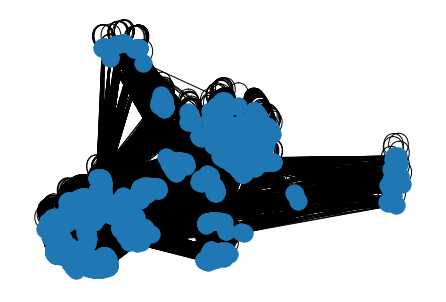

In [122]:
nx.draw(G_new)

### References

*Social Network Analysis for Startups* by Maksim Tsvetovat, Alexander Kouznetsov <br> 
Data Formats for Networks by Dai Shizuka: https://dshizuka.github.io/networkanalysis/02_dataformats.html <br>
NetworkX Official Documentation: https://networkx.org/documentation/stable/index.html <br>
Differing Views Recommender System: https://github.com/mattlucich/Differing-Views-Recommender-System  <br>
StackOverflow: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value